# Business Understanding

## Introduction
 For telecommunications companies such as Syria Tel, the loss of paying subscribers is a major challenge. This leads to a reduction in revenue, increased costs associated with the acquisition of customers and diminished brand loyalty. SyriaTel needs a strong and datadriven approach to proactively tackle customer turnover and increase retention of customers.
## Problem Statement
The goal of this project is to use SyriaTel's customer data to create a model for predicting customer churn. SyriaTel will be able to implement targeted retention strategies and reduce customer attrition by using the model to identify customers who are at high risk of churning. 

## Business Objectives
- Forecasting customer churn to lower client attrition.
- Focusing on high-risk consumers for retention efforts.
- Increasing customer lifetime value by focusing on significant revenue contributors.
- Enhancing client experience to increase satisfaction and loyalty.
- Using model insights for customized marketing campaigns to re-engage potential customers.
## Data Description
The project will make use of a dataset from SyriaTel's customer relationship management (CRM) system that contains previous customer data. Features like user demographics, account information, call usage trends, and customer service interactions are anticipated to be included in this data.

## Expected Benefits
- Better customer experience: By anticipating problems and knowing how customers behave, businesses can build loyalty and improve the overall customer experience.
- Data-driven decision making: Strategic customer retention initiatives and resource allocation are guided by insights.
- Customized marketing initiatives: Models help with campaign customization for particular clientele groups.
- Proactive customer engagement: By addressing customer complaints and preventing churn, early detection of churn risk helps to prevent it.



## Data Understanding

### Dataset Overview
The customer relationship management (CRM) system of SyriaTel provides historical customer data in the dataset.
Customer demographics, account information, phone usage trends, and customer service exchanges are among the features.

### Structure and Features
- **Features:**
  - State of residence
  - Account length
  - Service plans (e.g., international plan, voice mail plan)
  - Call usage metrics (e.g., total minutes, number of calls)
  - Customer service interactions
  
### Potential Issues
- Missing values: Determine appropriate handling procedures after looking for any missing values in the dataset.
- Outliers: Spot any outliers in numerical features and assess whether further action is required.
- Data discrepancies: Check categorical characteristics for errors or inconsistencies that could impact analysis.


### Data Preprocessing
To address missing numbers, outliers, and inconsistencies, clean up the dataset. carrying out required transformations, such as scaling numerical characteristics and encoding categorical variables.

## Data Exploration

### Overview
The first analysis of the SyriaTel customer churn dataset aimed to understand its properties and potential connections to customer attrition.
Service plans, consumption patterns, and client demographics are all included in the dataset. Examining feature distribution, spotting anomalies, and figuring out possible connections between variables and the target variable were the key goals.

##### Importing Libraries 

In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

##### Loading CSV data

In [34]:
# Load the data from a CSV file
df = pd.read_csv("churn.csv")

# Display first 10 rows
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [28]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   


The **info()** method was used to load the dataset and examine its contents. It was found that each column included 3333 non-null entries. This suggests that the dataset is free of missing values.


In [20]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The **df.isnull().sum()** method was used to further verify that there were no missing values, and it returned 0 to indicate this. We can confidently move forward with additional research and modeling now that there are no missing values.

## Exploratory Data Analysis

### 1. Univariate Analysis

Individual variables were analyzed to understand the distribution of the independent variables.

##### Visualisations

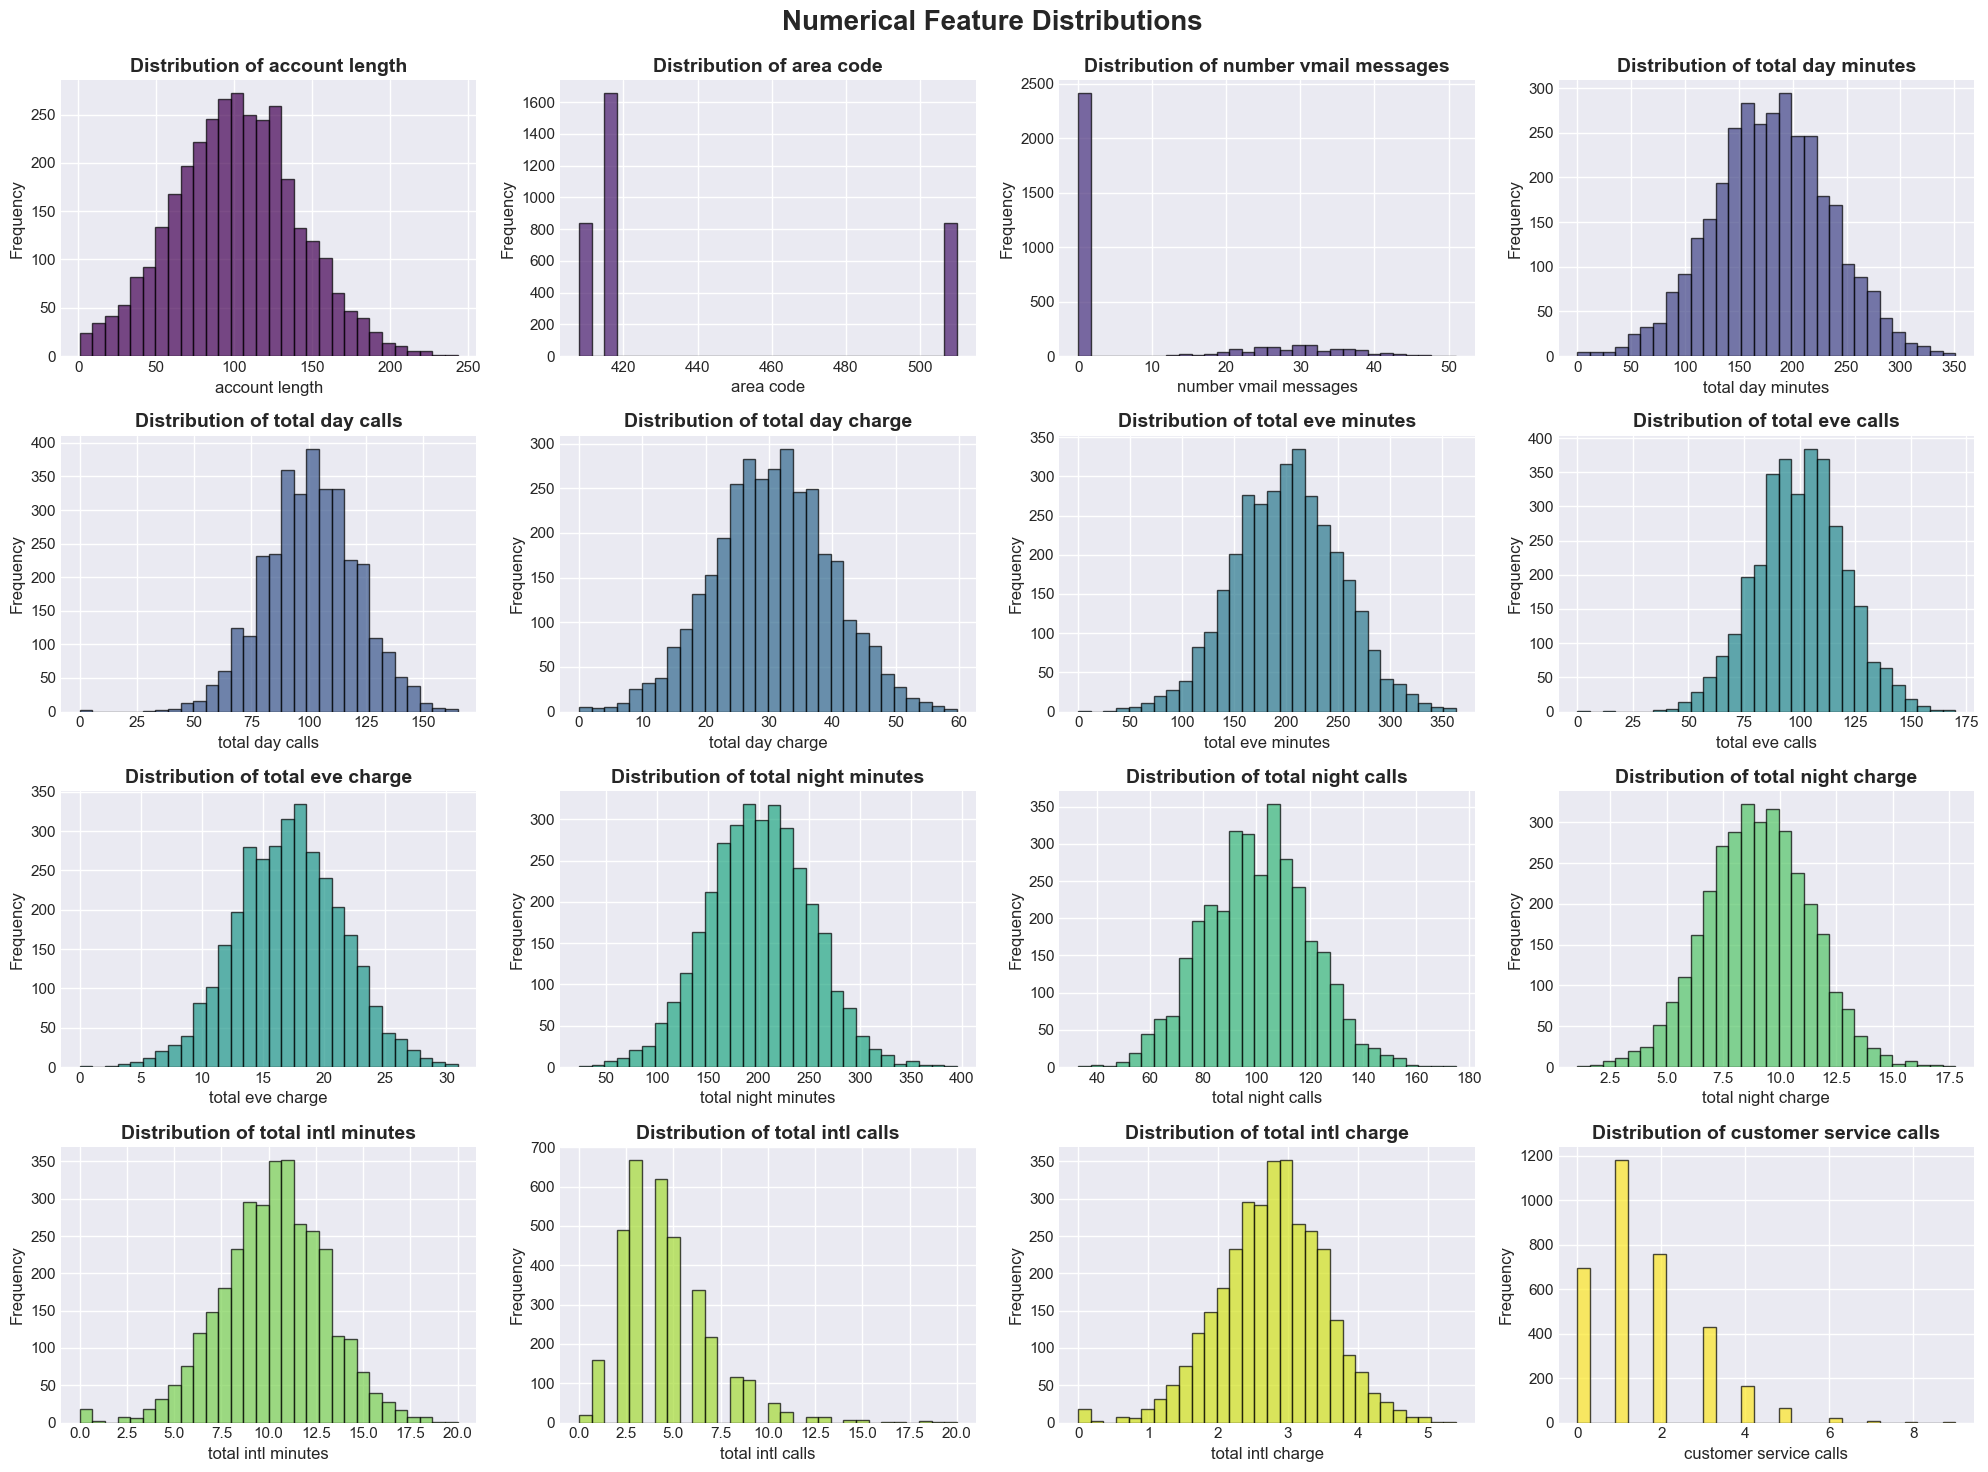

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# Load the data
df = pd.read_csv("churn.csv")

# Select only numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of rows and columns needed for subplots
num_features = len(numerical_features)
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

# Set the style
plt.style.use('seaborn-darkgrid')

# Create a color palette
colors = plt.cm.viridis(np.linspace(0, 1, num_features))

# Visualize numerical features
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
axes = axes.flatten()  # Flatten the axes array to make indexing easier

for i, (column, color) in enumerate(zip(numerical_features, colors)):
    ax = axes[i]
    ax.hist(df[column].dropna(), bins=30, color=color, alpha=0.7, edgecolor='black')
    ax.set_title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(True)

# Remove empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Numerical Feature Distributions', fontsize=20, fontweight='bold')
plt.show()


The numerical data showed a right-skewed pattern in customer tenure and call durations across different time periods, suggesting lower usage patterns. International calls may have higher volumes for a smaller customer segment. Customer service calls showed a multimodal distribution, indicating distinct groups with varying frequency of contacting customer service. Understanding these relationships and potential outliers can help predict churn.

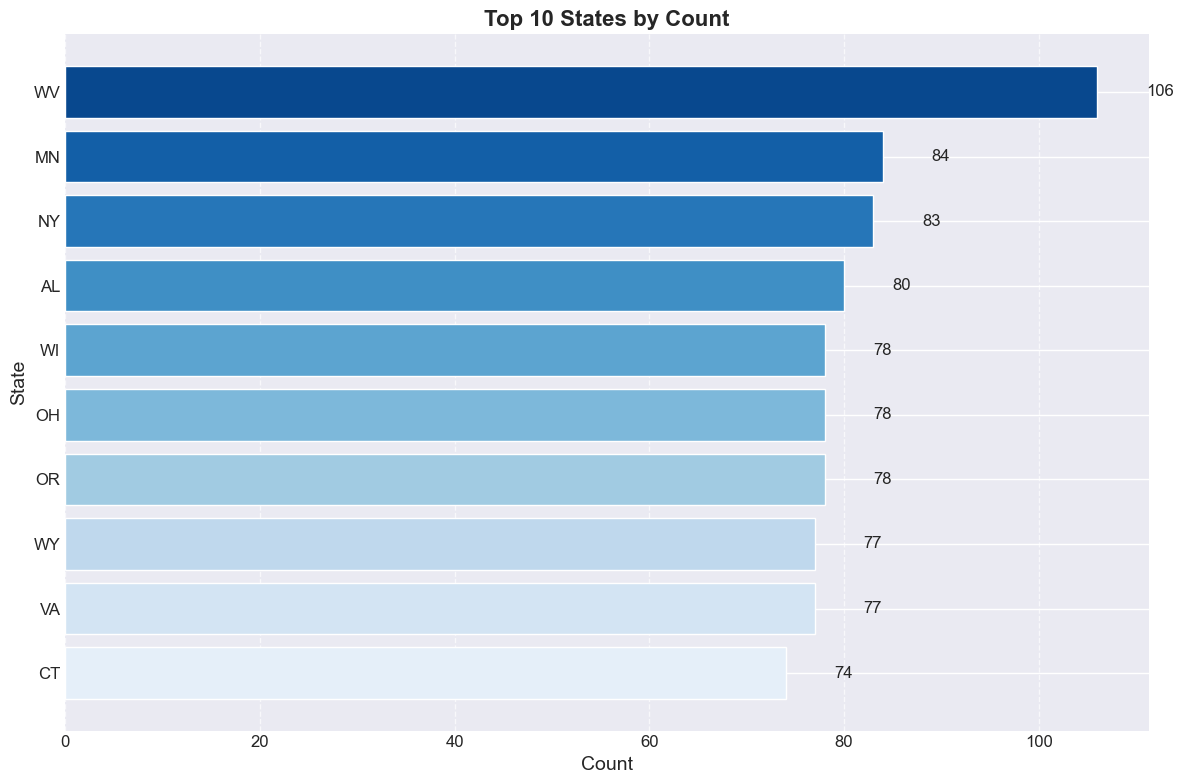

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top ten states by count
top_states = df['state'].value_counts().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(top_states.index, top_states.values, color=sns.color_palette("Blues_r", 10))

# Adding annotations
for bar, count in zip(bars, top_states.values):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, f'{count}', 
             va='center', ha='left', fontsize=12)

# Customizing plot aesthetics
plt.title('Top 10 States by Count', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.tight_layout()

plt.show()


Customers primarily from West Virginia, Minnesota, and New York make up SyriaTel's customer base.

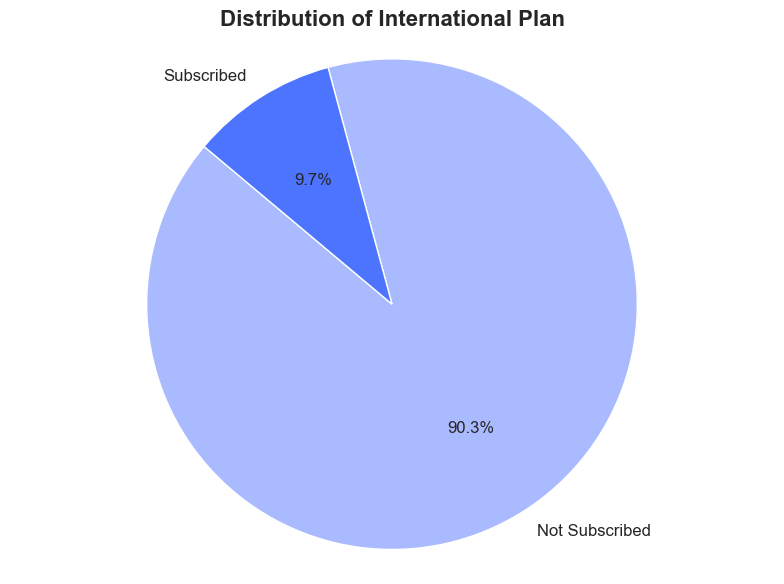

In [56]:
import matplotlib.pyplot as plt

# Define custom colors
light_blue = '#4c74ff'
lighter_blue = '#aabaff'

# Calculate the percentage of each category
international_plan_counts = df['international plan'].value_counts()
labels = ['Subscribed' if x == 'yes' else 'Not Subscribed' for x in international_plan_counts.index]
sizes = international_plan_counts.values
colors = [lighter_blue, light_blue]

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Distribution of International Plan', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

plt.show()


only 9.7% are subcribed to the international plan.

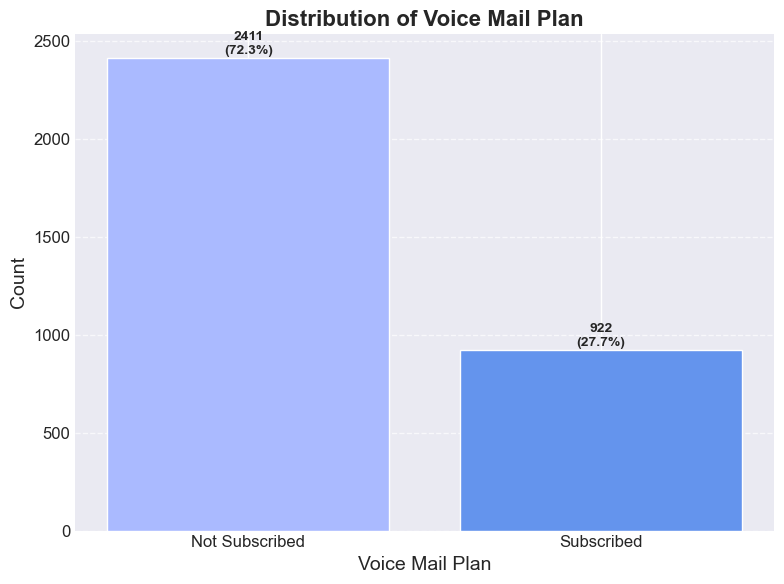

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'yes' and 'no' with 'Subscribed' and 'Not Subscribed'
df['voice mail plan'] = df['voice mail plan'].replace({'yes': 'Subscribed', 'no': 'Not Subscribed'})

# Calculate counts for each category
counts = df['voice mail plan'].value_counts()

# Plotting a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(counts.index, counts, color=[lighter_blue, light_blue])

# Adding annotations
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{count}\n({count / counts.sum() * 100:.1f}%)',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customizing plot aesthetics
plt.title('Distribution of Voice Mail Plan', fontsize=16, fontweight='bold')
plt.xlabel('Voice Mail Plan', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


only 27.7% of customers have subscribed to voice mail service

### Distribution of Churn
The 'churn' variable delineates whether a customer has churned or not. The endeavor encompassed a univariate analysis to elucidate the distribution of churn within the dataset.

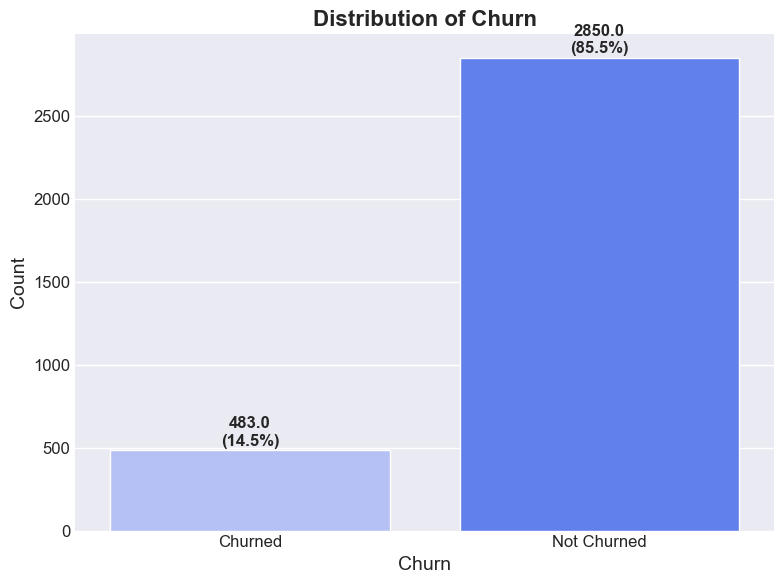

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors
light_blue = '#4c74ff'
lighter_blue = '#aabaff'

# Replace 'True' and 'False' with 'Churned' and 'Not Churned'
df['churn'] = df['churn'].replace({True: 'Churned', False: 'Not Churned'})

# Calculate churn percentages
churn_counts = df['churn'].value_counts()
churn_percentages = churn_counts / churn_counts.sum() * 100

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='churn', palette=[lighter_blue, light_blue], order=['Churned', 'Not Churned'])

# Adding annotations
total = len(df['churn'])  # Total number of records
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 10, f'{height}\n({height / total * 100:.1f}%)',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Title and labels
plt.title('Distribution of Churn', fontsize=16, fontweight='bold')
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


A detailed analysis of churn was conducted by counting the number of consumers who stopped using the service and the number of customers who continued. The following are the outcomes:

Total number of churned customers: 483 There were 2850 clients that remained loyal.

### Bivariate Analysis
This bivariate analysis of the association between the target variable, "churn," and the first eight numerical features in the dataset. Visualizing the relationship between each numerical feature and the chance of churn was the goal. 



In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_distribution(df, feature):
    """
    Plots the distribution of a categorical feature in the given DataFrame based on churn rate.
    """
    # Create figure and set its background color
    fig = plt.figure(figsize=(10, 5), facecolor='#EFEFEF')

    # Calculate the sum of churn for each category of the feature and sort in descending order
    churn_counts = df.groupby(feature)["churn"].sum().sort_values(ascending=False)

    # Get the top 10 categories with the highest churn counts
    top_10_categories = churn_counts.head(10).index.tolist()

    # Create a bar plot of the feature, colored by churn
    sns.barplot(x=top_10_categories, y=churn_counts.loc[top_10_categories], palette=['#2196f3' if x%2 == 0 else '#0069c0' for x in range(len(top_10_categories))])

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Set the title and labels
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Churn Count', fontsize=12)

    # Show the plot
    plt.show()


### Multivariate analysis

This entailed looking at several variables' relationships at once. This study looked at the relationship between several features and the aim variable (customer churn) when taken into account collectively.

The correlations between the various variables in the dataset were found using a correlation matrix.

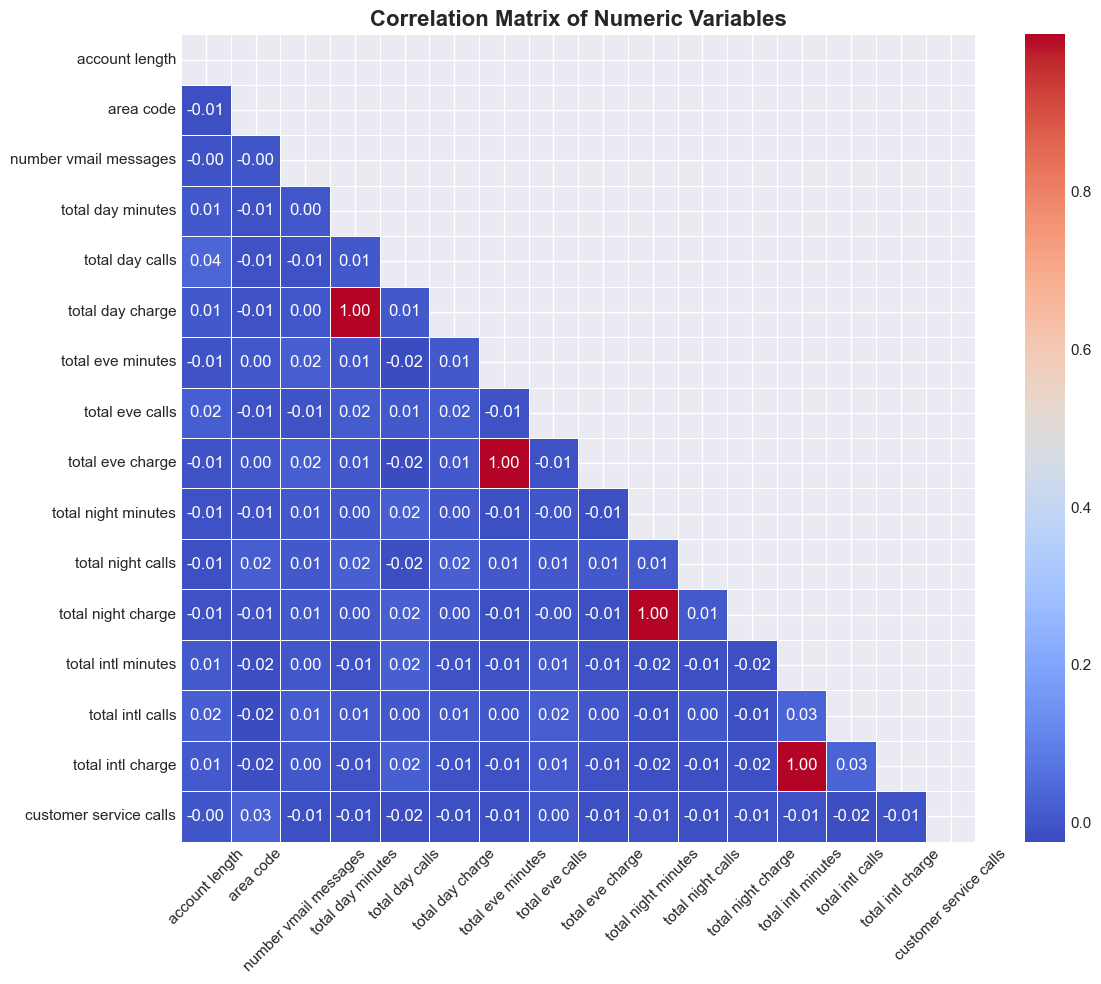

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Visualize correlation matrix
correlation_matrix = numeric_df.corr()

# Zero out lower triangular part
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=0)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix of Numeric Variables', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Correlation Matrix Analysis:** Call Numbers, Minutes, Charges
- Significant positive relationships between call numbers, minutes, and charges.
- Higher call spending leads to more calls.
- Weak positive link between call minutes and account length.
- Customer service calls show weak correlations, unrelated to calling habits or account tenure.
- International calls show favorable link, leading to increased spending.


## Data Preprocessing

**Label Encoding** converts label variables in "international plan", "voice mail plan", and "churn" columns to numeric form. The "Yes" and "No" categories are converted to 1 and 0, respectively, representing presence or absence. In the "churn" column, "False" and "True" categories are converted to 0 and 1, respectively, representing customer churn.



In [104]:
from sklearn.preprocessing import LabelEncoder

# Define categorical columns to be label encoded
cat_cols = ["international plan", "voice mail plan"]

# Apply label encoding to each categorical column
df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)

# Display the first ten rows to verify the changes
print(df.head(10))

  state  account length  area code phone number  international plan  \
0    KS             128        415     382-4657                   0   
1    OH             107        415     371-7191                   0   
2    NJ             137        415     358-1921                   0   
3    OH              84        408     375-9999                   1   
4    OK              75        415     330-6626                   1   
5    AL             118        510     391-8027                   1   
6    MA             121        510     355-9993                   0   
7    MO             147        415     329-9001                   1   
8    LA             117        408     335-4719                   0   
9    WV             141        415     330-8173                   1   

   voice mail plan  number vmail messages  total day minutes  total day calls  \
0                1                     25              265.1              110   
1                1                     26              1

**One-hot encoding** is a method that converts categorical variables into numerical format for machine learning algorithms, especially useful for dealing with variables with multiple categories.

In [105]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False, dtype=np.int64)

# Encode the "state" column
encoded_state = encoder.fit_transform(df[["state"]])

# Create a DataFrame with the encoded state columns
dummy_df_state = pd.DataFrame(encoded_state, columns=encoder.get_feature_names_out(["state"]))

# Concatenate the encoded state columns with the original DataFrame
one_df = pd.concat([df.drop(columns=["state"]), dummy_df_state], axis=1)

one_df.head(10)


,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0
5,118,510,391-8027,1,0,0,223.4,98,37.98,220.6,...,0,0,0,0,0,0,0,0,0,0
6,121,510,355-9993,0,1,24,218.2,88,37.09,348.5,...,0,0,0,0,0,0,0,0,0,0
7,147,415,329-9001,1,0,0,157.0,79,26.69,103.1,...,0,0,0,0,0,0,0,0,0,0
8,117,408,335-4719,0,0,0,184.5,97,31.37,351.6,...,0,0,0,0,0,0,0,0,0,0
9,141,415,330-8173,1,1,37,258.6,84,43.96,222.0,...,0,0,0,0,0,0,0,0,1,0


In [107]:
# Verify the changes
print(one_df.head(10))

   account length  area code phone number  international plan  \
0             128        415     382-4657                   0   
1             107        415     371-7191                   0   
2             137        415     358-1921                   0   
3              84        408     375-9999                   1   
4              75        415     330-6626                   1   
5             118        510     391-8027                   1   
6             121        510     355-9993                   0   
7             147        415     329-9001                   1   
8             117        408     335-4719                   0   
9             141        415     330-8173                   1   

   voice mail plan  number vmail messages  total day minutes  total day calls  \
0                1                     25              265.1              110   
1                1                     26              161.6              123   
2                0                      0

In [114]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Example DataFrame
df = pd.DataFrame({
    'area code': [408, 415, 408, 510],
    'other_column': [1, 2, 3, 4]
})

# Check if "area code" column exists in the DataFrame
if "area code" in df.columns:
    # One-hot encoding for "area code" column and updating the DataFrame
    encoder = OneHotEncoder(sparse_output=False)
    encoded = encoder.fit_transform(df[["area code"]])
    df = df.join(pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["area code"]))).drop("area code", axis=1)

df.head(10)


,other_column,area code_408,area code_415,area code_510
0,1,1.0,0.0,0.0
1,2,0.0,1.0,0.0
2,3,1.0,0.0,0.0
3,4,0.0,0.0,1.0


**Scaling numerical features** is important for algorithms that are sensitive to feature scales, such as gradient descent-based algorithms and distance-based algorithms.

In [115]:
newdf = one_df

In [121]:
newdf.dtypes

account length           int64
area code                int64
international plan       int64
voice mail plan          int64
number vmail messages    int64
                         ...  
state_VT                 int64
state_WA                 int64
state_WI                 int64
state_WV                 int64
state_WY                 int64
Length: 70, dtype: object

In [123]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Define numeric columns
numeric_columns = newdf.select_dtypes(include=['number']).columns

# Drop rows with NaN values in numeric columns
newdf.dropna(subset=numeric_columns, inplace=True)

# Check if there are numeric columns to scale
if numeric_columns.empty:
    print("No numeric columns found")
else:
    # Clean and scale numeric columns
    scaler = MinMaxScaler()
    newdf[numeric_columns] = scaler.fit_transform(newdf[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(newdf[numeric_columns].mean()))

    # Print the first few rows of the scaled DataFrame
    print(newdf[numeric_columns].head(10))

   account length  area code  international plan  voice mail plan  \
0        0.524793   0.068627                 0.0              1.0   
1        0.438017   0.068627                 0.0              1.0   
2        0.561983   0.068627                 0.0              0.0   
3        0.342975   0.000000                 1.0              0.0   
4        0.305785   0.068627                 1.0              0.0   
5        0.483471   1.000000                 1.0              0.0   
6        0.495868   1.000000                 0.0              1.0   
7        0.603306   0.068627                 1.0              0.0   
8        0.479339   0.000000                 0.0              0.0   
9        0.578512   0.068627                 1.0              1.0   

   number vmail messages  total day minutes  total day calls  \
0               0.490196           0.755701         0.666667   
1               0.509804           0.460661         0.745455   
2               0.000000           0.693843     

**splitting the data** to guarantee an objective assessment of the models ie: the data must be divided into training and testing sets before modeling can begin.

In [125]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = newdf.drop(columns=['churn'])  # Features
y = newdf['churn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2666, 69)
y_train shape: (2666,)
X_test shape: (667, 69)
y_test shape: (667,)


**class imbalance** can be averted by the use of random oversampling through the resample function addresses class imbalance, ensuring a fairer representation of data and potentially enhancing the model's performance in handling imbalanced datasets

In [134]:
from sklearn.utils import resample
import numpy as np

# Combine X_train and y_train to resample
train_data = np.column_stack((X_train, y_train))

# Separate the majority and minority classes
majority_class = train_data[train_data[:, -1] == np.bincount(y_train).argmax()]
minority_class = train_data[train_data[:, -1] == np.bincount(y_train).argmin()]

# Perform random oversampling on the minority class
minority_class_upsampled = resample(minority_class, 
                                    replace=True,  # Sample with replacement
                                    n_samples=majority_class.shape[0],  # Match number in majority class
                                    random_state=42)  # Reproducible results

# Combine majority class with upsampled minority class
resampled_data = np.vstack((majority_class, minority_class_upsampled))

# Separate X and y
X_train_resampled = resampled_data[:, :-1]
y_train_resampled = resampled_data[:, -1].astype(int)  # Convert y to integers

# Verify the result
print("Original class distribution:", np.bincount(y_train))
print("Resampled class distribution:", np.bincount(y_train_resampled))


Original class distribution: [2284  382]
Resampled class distribution: [2284 2284]


## Modelling

### Introduction
Modelling is a pivotal stage in every machine learning project, where we train predictive models on available data to accurately predict or decide outcomes for unseen data. In the context of the SyriaTel Customer Churn project, our goal is to develop a classifier that forecasts whether a customer will churn based on various features such as call usage, account details, and customer service interactions.

### Training Approaches
For the SyriaTel Customer Churn project, we will utilize multiple machine learning algorithms to train our predictive models. These algorithms encompass:

- **Logistic Regression**: A linear model used for binary classification tasks, predicting the probability of a binary outcome based on predictor variables.
- **Decision Trees**: A non-linear model that divides data into hierarchical decision nodes based on feature values, culminating in a prediction at the leaf nodes.
- **XGBoost**: An optimized implementation of gradient boosting, sequentially building an ensemble of weak learners to enhance predictive performance.




***Logistic regression** is a widely used algorithm for binary classification tasks, like predicting customer churn, by estimating the probability of an instance belonging to a specific class.
The logistic regression model is trained using numerical and encoded categorical features to predict customer churn. Its performance is evaluated using accuracy, precision, recall, F1-score, and ROC-AUC Score. Accuracy measures the proportion of correctly classified instances, precision measures the proportion of true positive predictions, recall measures the proportion of true positive predictions, F1-score provides a balanced measure, and ROC-AUC Score measures the model's ability to distinguish between positive and negative instances.

We employ cross-validation to obtain robust estimates of the logistic regression model's performance. Cross-validation assesses the model's generalization ability and mitigates the risk of overfitting to the training data.


In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.856071964017991

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.58      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



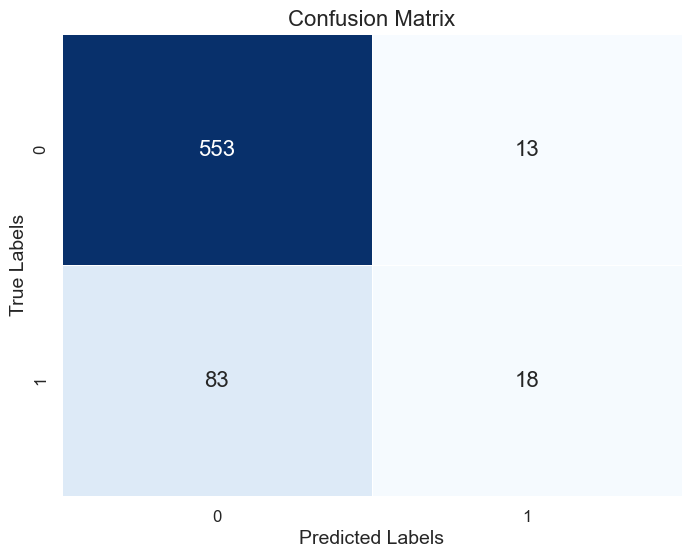

In [141]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={"size": 16}, linewidths=0.5)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Despite having an accuracy of 85%, the logistic regression model's recall and precision for predicting churn are both poor at 18% and 58%, respectively, suggesting a large miss of actual churn cases. The model might not be the best option for this classification assignment, according to these results.

***Decision Trees** are non-parametric supervised learning models used for classification and regression tasks. They partition feature space into smaller regions based on the feature providing the most information gain or reduction in impurity.

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.9235382308845578

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.96      0.96       566
        True       0.76      0.73      0.74       101

    accuracy                           0.92       667
   macro avg       0.85      0.85      0.85       667
weighted avg       0.92      0.92      0.92       667



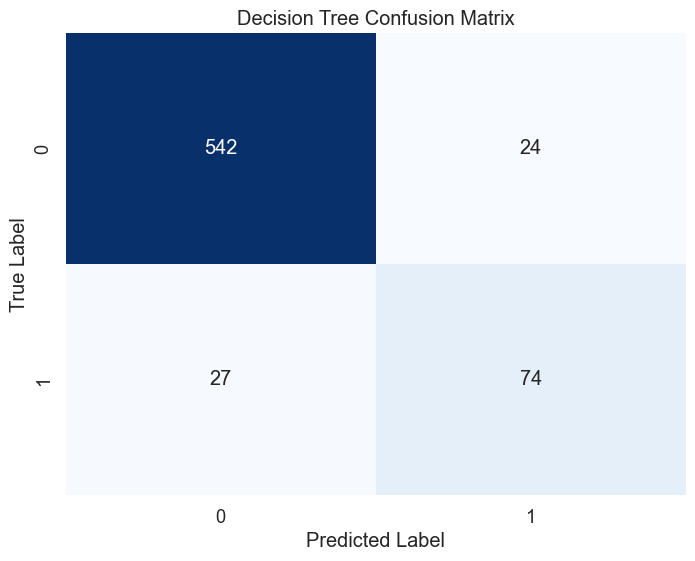

In [143]:
# Generate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The decision tree model achieved an accuracy of 92.3% , with a precision of 76% for predicting churn 1, and a recall of 73% , indicating a good proportion of actual churn cases, indicating its performance in this classification task.

**XG Boost**

In [144]:
from xgboost import XGBClassifier

# Initialize XGBoost classifier
xgb = XGBClassifier()

# Train the model
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.9610194902548725

Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       566
        True       0.96      0.77      0.86       101

    accuracy                           0.96       667
   macro avg       0.96      0.88      0.92       667
weighted avg       0.96      0.96      0.96       667



This XGBoost model demonstrates high precision, indicating that when it predicts a customer will churn (True), it is correct 96% of the time. However, its recall for churn is lower at 77%

In [ ]:
## Hyperparameter Tuning
We are going to select the two best performing models and tune them